In [1]:
import pandas as pd

In [2]:
results_df = pd.read_csv('../data/results.csv')
results_df.head()

,Model,Prompting,Keyword,Budget,AIME 2025,MATH500,MMLU Pro-1K,SuperGPQA-1K
0,Qwen2.5 7B Instruct,Zero-shot,NaN,NaN,20.00,69.0,30.3,18.1
1,Qwen2.5 7B Instruct,CoT,NaN,NaN,23.33,68.0,12.0,6.7
2,Qwen2.5 7B Instruct,CoT+BF,Wait,256.0,20.00,41.2,43.5,24.9
3,Qwen2.5 7B Instruct,CoT+BF,Wait,512.0,6.67,55.8,46.7,26.1
4,Qwen2.5 7B Instruct,CoT+BF,Wait,1024.0,26.67,64.4,50.2,26.3


In [3]:
selected_models = ["RFT", "simplescaling/s1.1-7B", "open-thoughts/OpenThinker3-7B", "deepseek-ai/DeepSeek-R1-Distill-Qwen-7B"]
results_df = results_df[results_df['Model'].isin(selected_models)]

results_df = results_df[results_df['Prompting'].isin(["Zero-shot", "CoT", "CoT+BF"])]
results_df = results_df[(results_df['Budget'] == 8192) | (results_df['Budget'].isnull())]
results_df = results_df[(results_df['Keyword'] == "Wait") | (results_df['Keyword'].isnull())]

results_df.head()

,Model,Prompting,Keyword,Budget,AIME 2025,MATH500,MMLU Pro-1K,SuperGPQA-1K
10,RFT,CoT,NaN,NaN,20.00,69.4,9.8,6.7
16,RFT,CoT+BF,Wait,8192.0,23.33,63.8,45.2,27.8
19,simplescaling/s1.1-7B,Zero-shot,NaN,NaN,20.00,73.6,40.2,17.4
25,simplescaling/s1.1-7B,CoT+BF,Wait,8192.0,23.33,74.2,62.1,33.4
28,open-thoughts/OpenThinker3-7B,Zero-shot,NaN,NaN,26.67,81.0,51.4,24.6


In [4]:
table_df = results_df.copy()
table_df["Approach"] = table_df["Prompting"].map(lambda x: "Zero-shot" if x in ["Zero-shot", "CoT"] else "CoT+BF")
table_df = table_df[["Model", "Approach", "AIME 2025", "MATH500", "MMLU Pro-1K", "SuperGPQA-1K"]]

# Clean model names for better readability
table_df["Model"] = table_df["Model"].map({
    "RFT": "RFT",
    "simplescaling/s1.1-7B": "s1.1-7B",
    "open-thoughts/OpenThinker3-7B": "OpenThinker3-7B",
    "deepseek-ai/DeepSeek-R1-Distill-Qwen-7B": "DeepSeek-R1-7B"
})

table_df["Average"] = table_df[["AIME 2025", "MATH500", "MMLU Pro-1K", "SuperGPQA-1K"]].mean(axis=1)

def format_num(x):
    try:
        return f"{float(x):.2f}"
    except:
        return ""

for col in ["AIME 2025", "MATH500", "MMLU Pro-1K", "SuperGPQA-1K", "Average"]:
    table_df[col] = table_df[col].apply(format_num)

print(table_df.to_markdown(index=False, floatfmt=".2f"))

| Model           | Approach   |   AIME 2025 |   MATH500 |   MMLU Pro-1K |   SuperGPQA-1K |   Average |
|:----------------|:-----------|------------:|----------:|--------------:|---------------:|----------:|
| RFT             | Zero-shot  |       20.00 |     69.40 |          9.80 |           6.70 |     26.48 |
| RFT             | CoT+BF     |       23.33 |     63.80 |         45.20 |          27.80 |     40.03 |
| s1.1-7B         | Zero-shot  |       20.00 |     73.60 |         40.20 |          17.40 |     37.80 |
| s1.1-7B         | CoT+BF     |       23.33 |     74.20 |         62.10 |          33.40 |     48.26 |
| OpenThinker3-7B | Zero-shot  |       26.67 |     81.00 |         51.40 |          24.60 |     45.92 |
| OpenThinker3-7B | CoT+BF     |       53.33 |     87.00 |         61.10 |          36.60 |     59.51 |
| DeepSeek-R1-7B  | Zero-shot  |       33.33 |     81.00 |         12.00 |           5.20 |     32.88 |
| DeepSeek-R1-7B  | CoT+BF     |       26.67 |     83.40 |      

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = '#f8f9fa'


In [6]:
from plot_utils import prepare_display_dataframe

display_df = prepare_display_dataframe(results_df, apply_styling=False)
styled_table = prepare_display_dataframe(results_df, apply_styling=True)

styled_table


,Model,Approach,AIME 2025,MATH500,MMLU Pro-1K,SuperGPQA-1K,Average
0,DeepSeek-R1-7B,CoT+BF,26.67,83.40,10.80,6.70,31.89
1,DeepSeek-R1-7B,Zero-shot,33.33,81.00,12.00,5.20,32.88
2,OpenThinker3-7B,CoT+BF,53.33,87.00,61.10,36.60,59.51
3,OpenThinker3-7B,Zero-shot,26.67,81.00,51.40,24.60,45.92
4,RFT,CoT+BF,23.33,63.80,45.20,27.80,40.03
5,RFT,Zero-shot,20.00,69.40,9.80,6.70,26.48
6,s1.1-7B,CoT+BF,23.33,74.20,62.10,33.40,48.26
7,s1.1-7B,Zero-shot,20.00,73.60,40.20,17.40,37.80


## 📈 Performance Comparison: Zero-shot vs CoT+BF


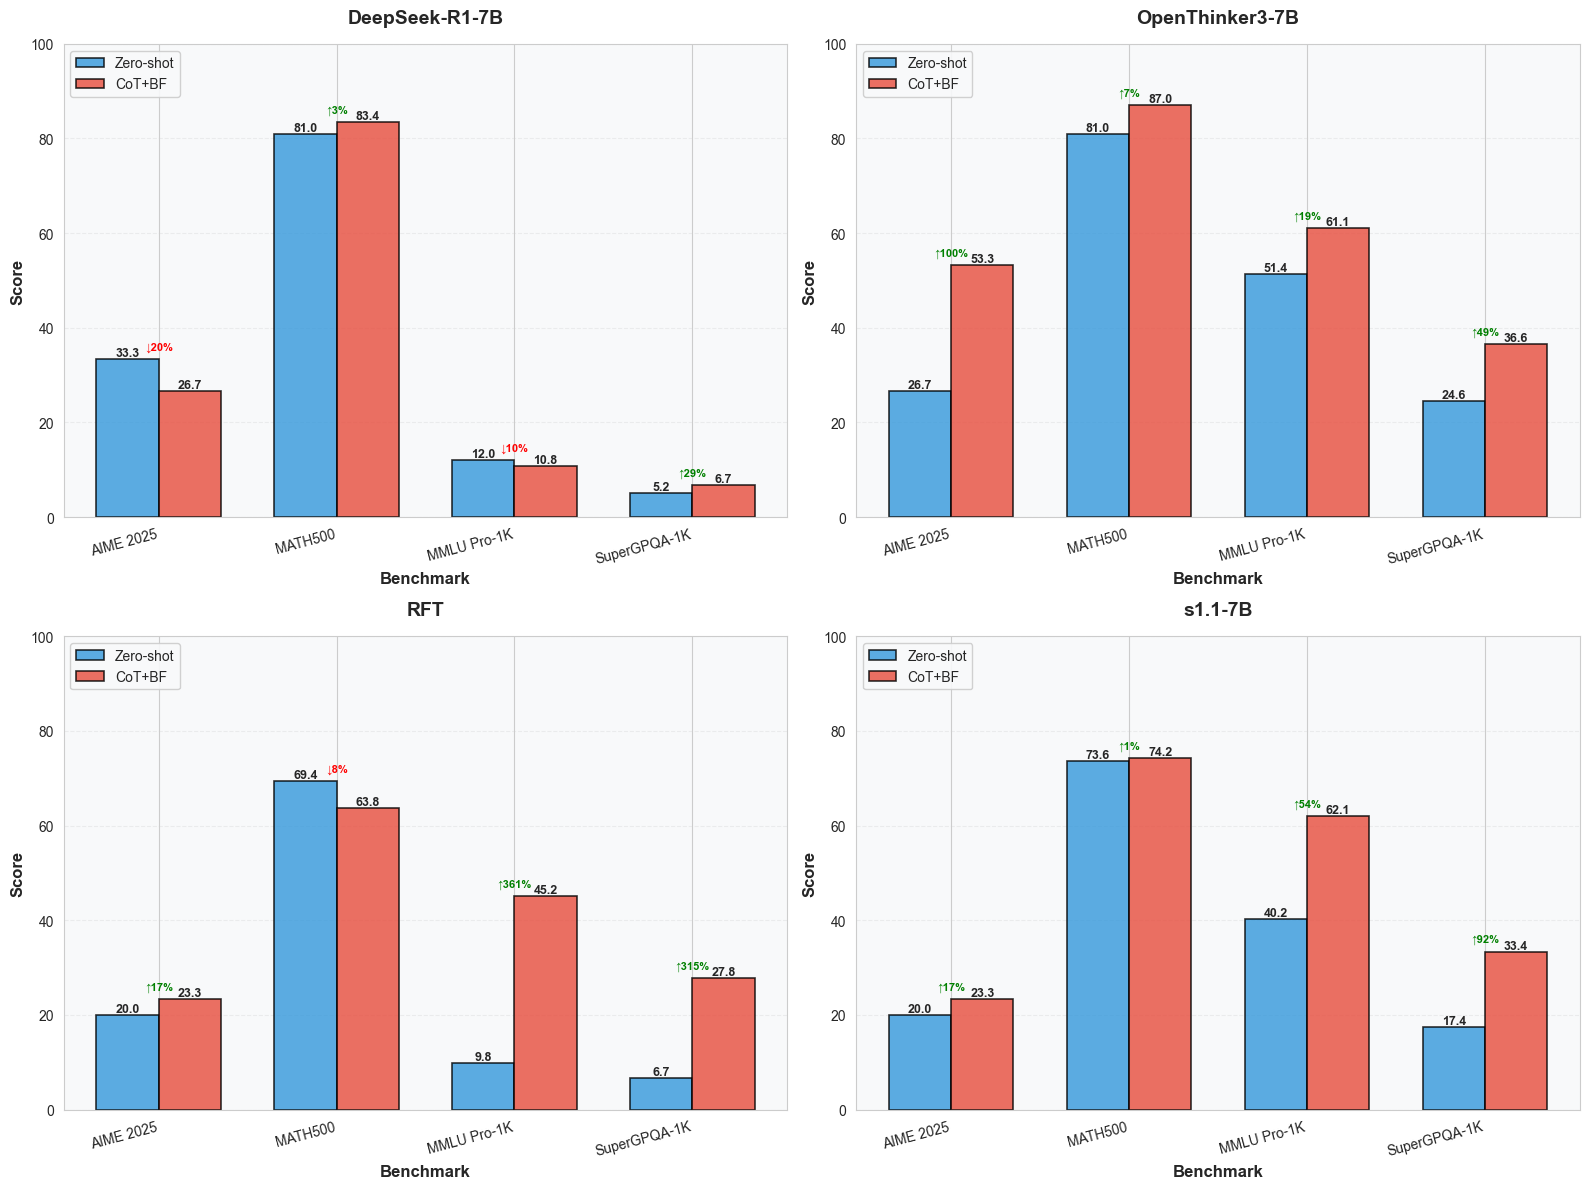

In [7]:
from plot_utils import plot_performance_comparison, plot_average_performance

plot_df = plot_performance_comparison(display_df)

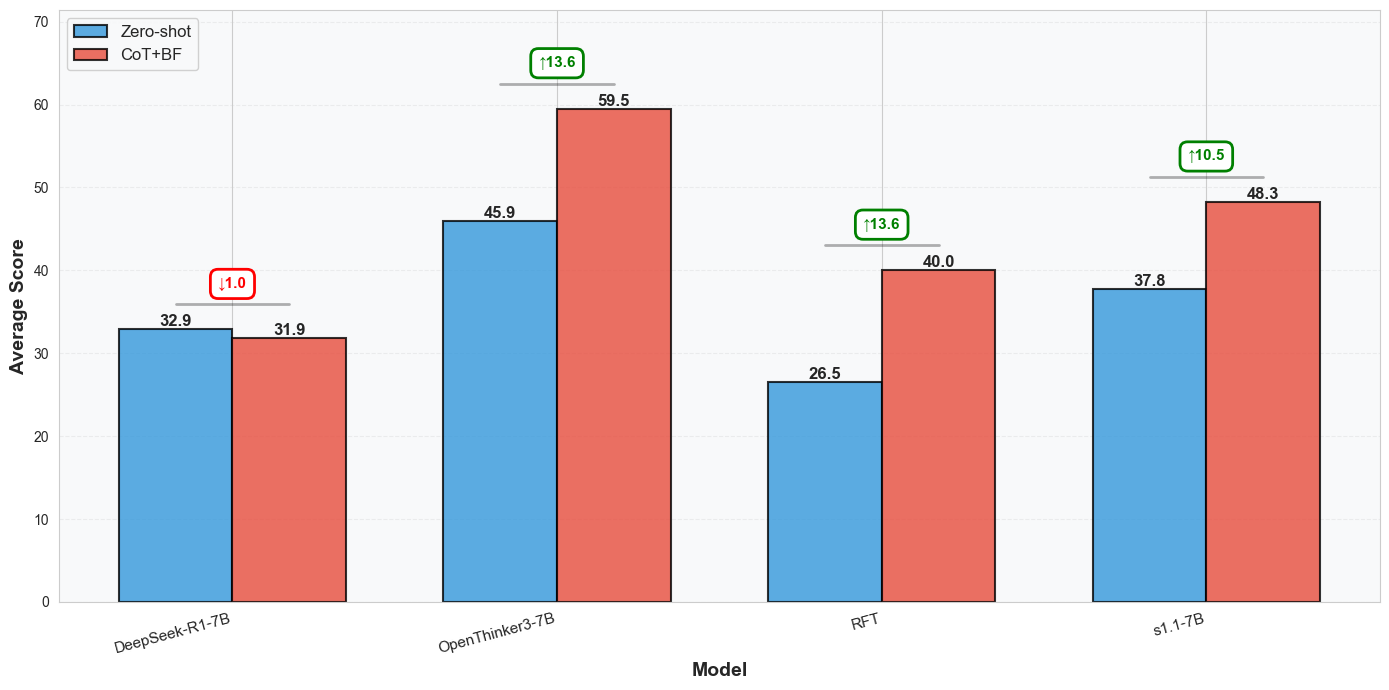

In [8]:
plot_average_performance(plot_df)

In [9]:
## 📊 Qwen2.5 7B Instruct Analysis


In [10]:
# Load and filter Qwen2.5 7B Instruct data
qwen_results_df = pd.read_csv('../data/results.csv')
qwen_results_df = qwen_results_df[qwen_results_df['Model'] == "Qwen2.5 7B Instruct"]
qwen_results_df = qwen_results_df[qwen_results_df['Prompting'].isin(["Zero-shot", "CoT", "CoT+BF"])]
qwen_results_df = qwen_results_df[(qwen_results_df['Budget'] == 8192) | (qwen_results_df['Budget'].isnull())]
qwen_results_df = qwen_results_df[(qwen_results_df['Keyword'] == "Wait") | (qwen_results_df['Keyword'].isnull())]

qwen_results_df.head()


,Model,Prompting,Keyword,Budget,AIME 2025,MATH500,MMLU Pro-1K,SuperGPQA-1K
0,Qwen2.5 7B Instruct,Zero-shot,NaN,NaN,20.00,69.0,30.3,18.1
1,Qwen2.5 7B Instruct,CoT,NaN,NaN,23.33,68.0,12.0,6.7
7,Qwen2.5 7B Instruct,CoT+BF,Wait,8192.0,20.00,61.0,48.7,27.4


In [11]:
# Prepare and display styled table for Qwen model
qwen_display_df = prepare_display_dataframe(qwen_results_df, apply_styling=False)
qwen_styled_table = prepare_display_dataframe(qwen_results_df, apply_styling=True)

qwen_styled_table


,Model,Approach,AIME 2025,MATH500,MMLU Pro-1K,SuperGPQA-1K,Average
0,Qwen2.5-7B Instruct,CoT+BF,20.00,61.00,48.70,27.40,39.27
1,Qwen2.5-7B Instruct,Zero-shot,21.66,68.50,21.15,12.40,30.93


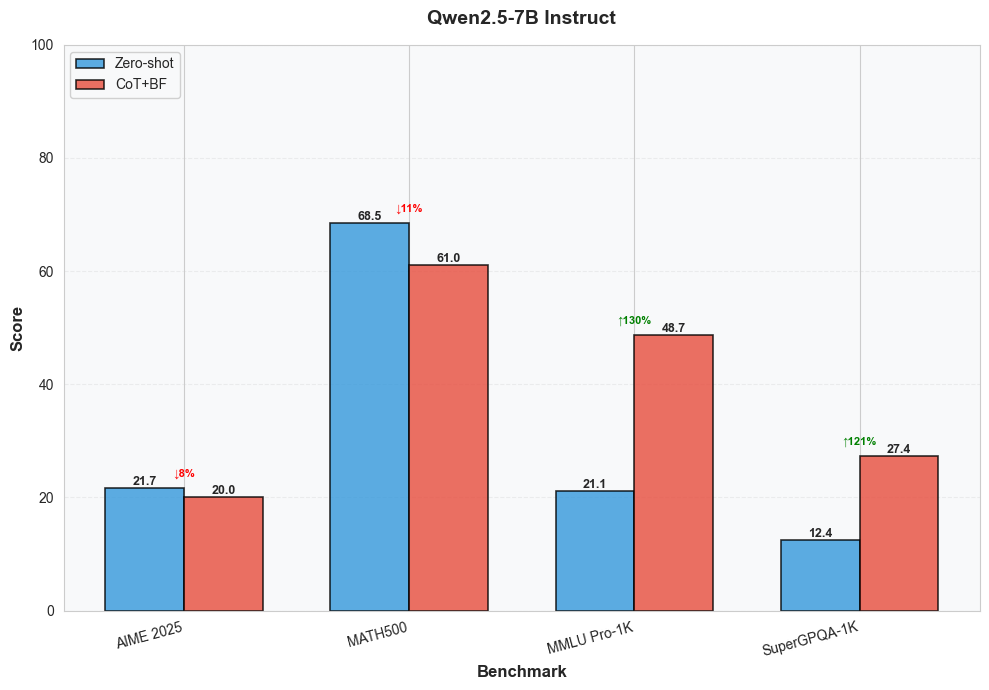

In [12]:
# Performance comparison plot for Qwen model
qwen_plot_df = plot_performance_comparison(
    qwen_display_df, 
    output_path='outputs/fig_qwen_performance_comparison.png'
)


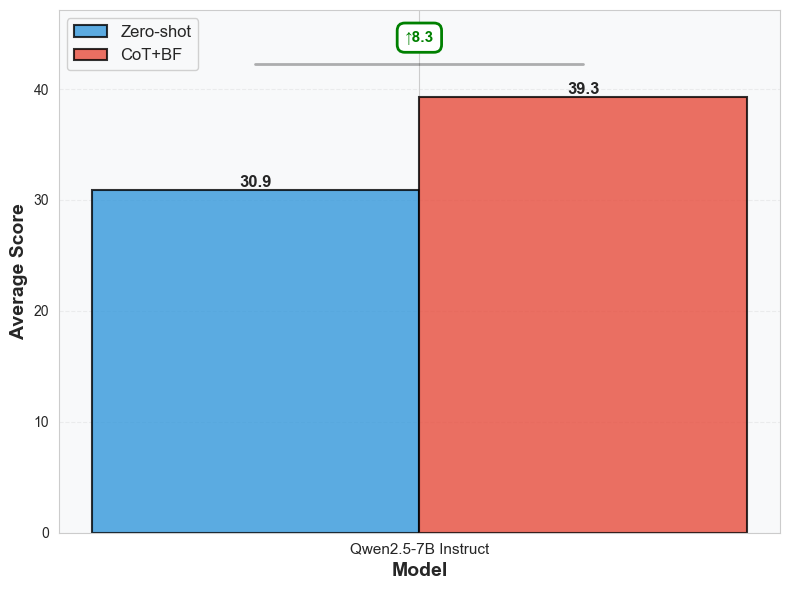

In [13]:
# Average performance plot for Qwen model
plot_average_performance(qwen_plot_df, output_path='outputs/fig_qwen_average_performance.png')
